In [1]:
from tifffile import imread
from csbdeep.utils import axes_dict, plot_some, plot_history
from csbdeep.io import load_training_data
from csbdeep.models import Config, CARE
import os
import matplotlib.pyplot as plt
os.environ["CUDA_VISIBLE_DEVICES"]="0"

Using TensorFlow backend.


In [2]:
BaseDir = '/home/sancere/Kepler/CurieTrainingDatasets/Dalmiro_Laura/'
NPZdata = 'WingCompartmentModelUNET.npz'

ModelDir ='/home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/'
ModelName = 'WingCompartmentUNET_tricky'
load_path = BaseDir + NPZdata 

In [3]:
(X,Y), (X_val,Y_val), axes = load_training_data(load_path, validation_split=0.05, verbose=True)

c = axes_dict(axes)['C']
n_channel_in, n_channel_out = X.shape[c], Y.shape[c]

number of training images:	 24
number of validation images:	 1
image size (2D):		 (768, 1024)
axes:				 SYXC
channels in / out:		 3 / 1


/home/sancere/anaconda3/envs/tensorflowGPU/lib/python3.7/site-packages/csbdeep/utils/plot_utils.py:55: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return _plot_some(arr=arr, title_list=title_list, pmin=pmin, pmax=pmax, cmap=cmap, **imshow_kwargs)


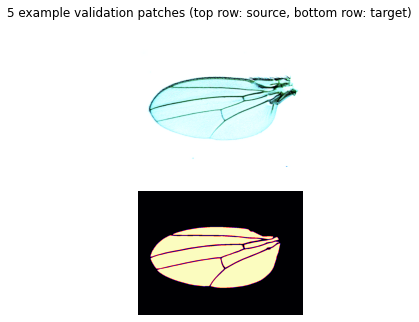

In [4]:
plt.figure(figsize=(12,5))
plot_some(X_val[:5],Y_val[:5])
plt.suptitle('5 example validation patches (top row: source, bottom row: target)');

In [5]:
config = config = Config(axes, n_channel_in, n_channel_out, probabilistic = False, unet_n_depth=5,unet_n_first = 48,unet_kern_size = 7, train_loss = 'mae', train_epochs= 150, train_learning_rate = 1.0E-4 ,train_batch_size = 4,  train_reduce_lr={'patience': 5, 'factor': 0.5})
print(config)
vars(config)

Config(axes='YXC', n_channel_in=3, n_channel_out=1, n_dim=2, probabilistic=False, train_batch_size=4, train_checkpoint='weights_best.h5', train_checkpoint_epoch='weights_now.h5', train_checkpoint_last='weights_last.h5', train_epochs=150, train_learning_rate=0.0001, train_loss='mae', train_reduce_lr={'patience': 5, 'factor': 0.5}, train_steps_per_epoch=400, train_tensorboard=True, unet_input_shape=(None, None, 3), unet_kern_size=7, unet_last_activation='linear', unet_n_depth=5, unet_n_first=48, unet_residual=False)


{'n_dim': 2,
 'axes': 'YXC',
 'n_channel_in': 3,
 'n_channel_out': 1,
 'train_checkpoint': 'weights_best.h5',
 'train_checkpoint_last': 'weights_last.h5',
 'train_checkpoint_epoch': 'weights_now.h5',
 'probabilistic': False,
 'unet_residual': False,
 'unet_n_depth': 5,
 'unet_kern_size': 7,
 'unet_n_first': 48,
 'unet_last_activation': 'linear',
 'unet_input_shape': (None, None, 3),
 'train_loss': 'mae',
 'train_epochs': 150,
 'train_steps_per_epoch': 400,
 'train_learning_rate': 0.0001,
 'train_batch_size': 4,
 'train_tensorboard': True,
 'train_reduce_lr': {'patience': 5, 'factor': 0.5}}

In [6]:
model = CARE(config = config, name = ModelName, basedir = ModelDir)
input_weights = ModelDir + ModelName + '/' +'weights_best.h5'
model.load_weights(input_weights)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



/home/sancere/anaconda3/envs/tensorflowGPU/lib/python3.7/site-packages/csbdeep/models/base_model.py:148: UserWarning: output path for model already exists, files may be overwritten: /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/WingCompartmentUNET_tricky
  warnings.warn('output path for model already exists, files may be overwritten: %s' % str(self.logdir.resolve()))


In [7]:
history = model.train(X,Y, validation_data=(X_val,Y_val))

/home/sancere/anaconda3/envs/tensorflowGPU/lib/python3.7/site-packages/csbdeep/models/care_standard.py:163: UserWarning: small number of validation images (only 4.0% of all images)
  warnings.warn("small number of validation images (only %.1f%% of all images)" % (100*frac_val))



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




Epoch 1/150
400/400 [==============================] - 1734s 4s/step - loss: 0.0056 - mse: 9.8956e-04 - mae: 0.0056 - val_loss: 0.0043 - val_mse: 0.0012 - val_mae: 0.0043

Epoch 2/150
400/400 [==============================] - 1705s 4s/step - loss: 0.0040 - mse: 4.7893e-04 - mae: 0.0040 - val_loss: 0.0037 - val_mse: 0.0013 - val_mae: 0.0037
Epoch 3/150
400/400 [==============================] - 1694s 4s/step - loss: 0.0046 - mse: 4.8738e-04 - mae: 0.0046 - val_loss: 0.0043 - val_mse: 0.0017 - val_mae: 0.0043
Epoch 4/150
400/400 [==============================] - 1683s 4s/step - loss: 0.0035 - mse: 3.6394e-04 - mae: 0.0035 - 

400/400 [==============================] - 1677s 4s/step - loss: 5.5140e-04 - mse: 4.5342e-05 - mae: 5.5140e-04 - val_loss: 0.0052 - val_mse: 0.0021 - val_mae: 0.0052
Epoch 37/150
400/400 [==============================] - 1677s 4s/step - loss: 5.4745e-04 - mse: 4.5045e-05 - mae: 5.4745e-04 - val_loss: 0.0052 - val_mse: 0.0021 - val_mae: 0.0052

Epoch 00037: ReduceLROnPlateau reducing learning rate to 7.81249980263965e-07.
Epoch 38/150
400/400 [==============================] - 1677s 4s/step - loss: 5.4290e-04 - mse: 4.4848e-05 - mae: 5.4290e-04 - val_loss: 0.0052 - val_mse: 0.0021 - val_mae: 0.0052
Epoch 39/150
400/400 [==============================] - 1677s 4s/step - loss: 5.4065e-04 - mse: 4.4661e-05 - mae: 5.4065e-04 - val_loss: 0.0052 - val_mse: 0.0021 - val_mae: 0.0052
Epoch 40/150
400/400 [==============================] - 1677s 4s/step - loss: 5.3826e-04 - mse: 4.4520e-05 - mae: 5.3826e-04 - val_loss: 0.0052 - val_mse: 0.0021 - val_mae: 0.0052
Epoch 41/150
400/400 [===========


Epoch 00077: ReduceLROnPlateau reducing learning rate to 3.051757735406113e-09.
Epoch 78/150
400/400 [==============================] - 1659s 4s/step - loss: 5.1307e-04 - mse: 4.3238e-05 - mae: 5.1307e-04 - val_loss: 0.0052 - val_mse: 0.0021 - val_mae: 0.0052
Epoch 79/150
400/400 [==============================] - 1659s 4s/step - loss: 5.1295e-04 - mse: 4.3213e-05 - mae: 5.1295e-04 - val_loss: 0.0052 - val_mse: 0.0021 - val_mae: 0.0052
Epoch 80/150
400/400 [==============================] - 1658s 4s/step - loss: 5.1294e-04 - mse: 4.3192e-05 - mae: 5.1294e-04 - val_loss: 0.0052 - val_mse: 0.0021 - val_mae: 0.0052
Epoch 81/150
400/400 [==============================] - 1658s 4s/step - loss: 5.1291e-04 - mse: 4.3222e-05 - mae: 5.1291e-04 - val_loss: 0.0052 - val_mse: 0.0021 - val_mae: 0.0052
Epoch 82/150
400/400 [==============================] - 1658s 4s/step - loss: 5.1293e-04 - mse: 4.3209e-05 - mae: 5.1293e-04 - val_loss: 0.0052 - val_mse: 0.0021 - val_mae: 0.0052

Epoch 00082: Reduc

400/400 [==============================] - 1648s 4s/step - loss: 5.1282e-04 - mse: 4.3184e-05 - mae: 5.1282e-04 - val_loss: 0.0052 - val_mse: 0.0021 - val_mae: 0.0052
Epoch 120/150
400/400 [==============================] - 1645s 4s/step - loss: 5.1285e-04 - mse: 4.3213e-05 - mae: 5.1285e-04 - val_loss: 0.0052 - val_mse: 0.0021 - val_mae: 0.0052
Epoch 121/150
400/400 [==============================] - 1650s 4s/step - loss: 5.1287e-04 - mse: 4.3232e-05 - mae: 5.1287e-04 - val_loss: 0.0052 - val_mse: 0.0021 - val_mae: 0.0052
Epoch 122/150
400/400 [==============================] - 1651s 4s/step - loss: 5.1282e-04 - mse: 4.3173e-05 - mae: 5.1282e-04 - val_loss: 0.0052 - val_mse: 0.0021 - val_mae: 0.0052

Epoch 00122: ReduceLROnPlateau reducing learning rate to 5.960464326965065e-12.
Epoch 123/150
400/400 [==============================] - 1648s 4s/step - loss: 5.1282e-04 - mse: 4.3213e-05 - mae: 5.1282e-04 - val_loss: 0.0052 - val_mse: 0.0021 - val_mae: 0.0052
Epoch 124/150
400/400 [=====

['loss', 'lr', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse']


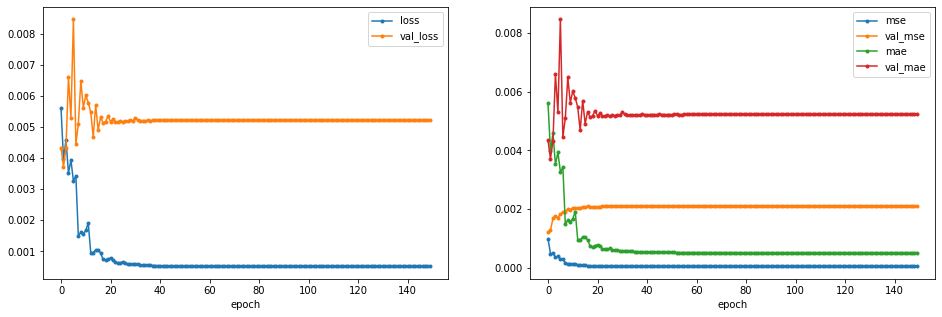

In [8]:
print(sorted(list(history.history.keys())))
plt.figure(figsize=(16,5))
plot_history(history,['loss','val_loss'],['mse','val_mse','mae','val_mae']);

In [11]:
plt.figure(figsize=(12,7))
_P = model.keras_model.predict(X_val[25:30])
if config.probabilistic:
    _P = _P[...,:(_P.shape[-1]//2)]
plot_some(X_val[0],Y_val[0],_P,pmax=99.5)
plt.suptitle('5 example validation patches\n'      
             'top row: input (source),  '          
             'middle row: target (ground truth),  '
             'bottom row: predicted from source');

IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 864x504 with 0 Axes>